# Dataset and Dataloaders

> Datasets and Dataloaders


- skip_showdoc: true
- skip_exec: true

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

In [ ]:
dataset = WineDataset()


In [ ]:
first_data = dataset[0]
first_data

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[1.2640e+01, 1.3600e+00, 2.0200e+00, 1.6800e+01, 1.0000e+02, 2.0200e+00,
          1.4100e+00, 5.3000e-01, 6.2000e-01, 5.7500e+00, 9.8000e-01, 1.5900e+00,
          4.5000e+02],
         [1.3240e+01, 2.5900e+00, 2.8700e+00, 2.1000e+01, 1.1800e+02, 2.8000e+00,
          2.6900e+00, 3.9000e-01, 1.8200e+00, 4.3200e+00, 1.0400e+00, 2.9300e+00,
          7.3500e+02],
         [1.1790e+01, 2.1300e+00, 2.7800e+00, 2.8500e+01, 9.2000e+01, 2.1300e+00,
          2.2400e+00, 5.8000e-01, 1.7600e+00, 3.0000e+00, 9.7000e-01, 2.4400e+00,
          4.6600e+02],
         [1.3160e+01, 3.5700e+00, 2.1500e+00, 2.1000e+01, 1.0200e+02, 1.5000e+00,
          5.5000e-01, 4.3000e-01, 1.3000e+00, 4.0000e+00, 6.0000e-01, 1.6800e+00,
          8.3000e+02]]),
 tensor([[2.],
         [1.],
         [2.],
         [3.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels 

(tensor([[1.3560e+01, 1.7100e+00, 2.3100e+00, 1.6200e+01, 1.1700e+02, 3.1500e+00,
          3.2900e+00, 3.4000e-01, 2.3400e+00, 6.1300e+00, 9.5000e-01, 3.3800e+00,
          7.9500e+02],
         [1.2000e+01, 3.4300e+00, 2.0000e+00, 1.9000e+01, 8.7000e+01, 2.0000e+00,
          1.6400e+00, 3.7000e-01, 1.8700e+00, 1.2800e+00, 9.3000e-01, 3.0500e+00,
          5.6400e+02],
         [1.2340e+01, 2.4500e+00, 2.4600e+00, 2.1000e+01, 9.8000e+01, 2.5600e+00,
          2.1100e+00, 3.4000e-01, 1.3100e+00, 2.8000e+00, 8.0000e-01, 3.3800e+00,
          4.3800e+02],
         [1.2220e+01, 1.2900e+00, 1.9400e+00, 1.9000e+01, 9.2000e+01, 2.3600e+00,
          2.0400e+00, 3.9000e-01, 2.0800e+00, 2.7000e+00, 8.6000e-01, 3.0200e+00,
          3.1200e+02]]),
 tensor([[1.],
         [2.],
         [2.],
         [2.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 13.2900,   1.9700,   2.6800,  16.8000, 102.0000]) labels:tensor([1.])
epoch 1/2, step 10/45, inputs:tensor([12.3600,  3.8300,  2.3800, 21.0000, 88.0000]) labels:tensor([3.])
epoch 1/2, step 15/45, inputs:tensor([12.3700,  1.6300,  2.3000, 24.5000, 88.0000]) labels:tensor([2.])
epoch 1/2, step 20/45, inputs:tensor([ 13.6800,   1.8300,   2.3600,  17.2000, 104.0000]) labels:tensor([1.])
epoch 1/2, step 25/45, inputs:tensor([14.8300,  1.6400,  2.1700, 14.0000, 97.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([ 13.6900,   3.2600,   2.5400,  20.0000, 107.0000]) labels:tensor([3.])
epoch 1/2, step 35/45, inputs:tensor([12.0800,  1.8300,  2.3200, 18.5000, 81.0000]) labels:tensor([2.])
epoch 1/2, step 40/45, inputs:tensor([ 12.6400,   1.3600,   2.0200,  16.8000, 100.0000]) labels:tensor([2.])
epoch 1/2, step 45/45, inputs:tensor([12.0000,  1.5100,  2.4200, 22.0000, 86.0000]) labels:tensor([2.])
epoch 2/2, step 5/45, inputs:tensor([11.8200,

## Dataset Transform

### Types of Transform:

#### On Images:
> CenterCrop, Grayscale, Pad, RandomAffine RandomCrop, RandomHorizontalFlip, RandomRotation Resize, Scale

#### On Tensors:
> LinearTransformation, Normalize, RandomErasing

#### Conversion:
> ToPILImage: from tensor or ndarray

> ToTensor: from numpy.ndarray or PIL Image

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform = None):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

In [ ]:
class ToTensor():
    def __call__(self, sample):
        inputs, targets  = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target
        

In [ ]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

In [ ]:
dataset = WineDataset(transform = composed)


In [ ]:
first_data = dataset[0]
first_data

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
         1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
         4.2600e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[2.6340e+01, 1.0380e+01, 4.6400e+00, 4.4000e+01, 1.8600e+02, 3.4800e+00,
          1.2600e+00, 1.2200e+00, 3.1000e+00, 1.5800e+01, 1.2000e+00, 2.9600e+00,
          1.4500e+03],
         [2.7740e+01, 3.8000e+00, 5.6000e+00, 3.8800e+01, 2.1400e+02, 5.9000e+00,
          5.9400e+00, 7.4000e-01, 3.5200e+00, 9.0000e+00, 2.5000e+00, 6.8000e+00,
          1.8300e+03],
         [2.8380e+01, 3.1800e+00, 4.9600e+00, 3.3000e+01, 2.1600e+02, 6.6000e+00,
          7.8600e+00, 6.4000e-01, 3.7200e+00, 1.7400e+01, 2.4600e+00, 5.6400e+00,
          3.3600e+03],
         [2.3580e+01, 4.2600e+00, 5.5600e+00, 5.7000e+01, 1.8400e+02, 4.2600e+00,
          4.4800e+00, 1.1600e+00, 3.5200e+00, 6.0000e+00, 1.9400e+00, 4.8800e+00,
          9.3200e+02]]),
 tensor([[3.],
         [1.],
         [1.],
         [2.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels 

(tensor([[2.7640e+01, 3.5000e+00, 4.8400e+00, 2.8000e+01, 2.2200e+02, 7.7600e+00,
          7.4800e+00, 6.4000e-01, 3.7400e+00, 1.4100e+01, 2.0200e+00, 6.5200e+00,
          2.3800e+03],
         [2.7120e+01, 3.4200e+00, 4.6200e+00, 3.2400e+01, 2.3400e+02, 6.3000e+00,
          6.5800e+00, 6.8000e-01, 4.6800e+00, 1.2260e+01, 1.9000e+00, 6.7600e+00,
          1.5900e+03],
         [2.6980e+01, 3.3200e+00, 4.4800e+00, 4.8000e+01, 1.7400e+02, 3.7600e+00,
          3.6800e+00, 5.4000e-01, 2.0600e+00, 7.4800e+00, 1.9600e+00, 5.5600e+00,
          9.4400e+02],
         [2.5680e+01, 5.9200e+00, 5.2200e+00, 4.8000e+01, 2.0200e+02, 4.6400e+00,
          1.2000e+00, 1.0600e+00, 1.6200e+00, 9.8400e+00, 1.7800e+00, 4.3000e+00,
          1.1800e+03]]),
 tensor([[1.],
         [1.],
         [2.],
         [3.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 24.5800,   2.8200,   3.9600,  32.0000, 170.0000]) labels:tensor([2.])
epoch 1/2, step 10/45, inputs:tensor([ 25.5800,   5.3400,   4.9600,  44.0000, 224.0000]) labels:tensor([3.])
epoch 1/2, step 15/45, inputs:tensor([ 28.1200,   3.2600,   4.5600,  32.0000, 252.0000]) labels:tensor([1.])
epoch 1/2, step 20/45, inputs:tensor([ 26.4800,   5.1800,   5.7400,  42.0000, 236.0000]) labels:tensor([1.])
epoch 1/2, step 25/45, inputs:tensor([ 26.8200,   7.6800,   4.2400,  37.6000, 180.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([ 26.9600,   3.6200,   4.8200,  41.0000, 200.0000]) labels:tensor([1.])
epoch 1/2, step 35/45, inputs:tensor([ 27.6600,   3.3000,   5.2000,  34.4000, 188.0000]) labels:tensor([1.])
epoch 1/2, step 40/45, inputs:tensor([ 25.5400,   6.8600,   3.9600,  32.0000, 160.0000]) labels:tensor([2.])
epoch 1/2, step 45/45, inputs:tensor([ 26.2200,   2.0200,   3.4000,  30.0000, 156.0000]) labels:tensor([2.])
epoch 2/2, step 5/45

In [ ]:
from torchvision import datasets

In [ ]:
datasets.__all__


('LSUN',
 'LSUNClass',
 'ImageFolder',
 'DatasetFolder',
 'FakeData',
 'CocoCaptions',
 'CocoDetection',
 'CIFAR10',
 'CIFAR100',
 'EMNIST',
 'FashionMNIST',
 'QMNIST',
 'MNIST',
 'KMNIST',
 'StanfordCars',
 'STL10',
 'SUN397',
 'SVHN',
 'PhotoTour',
 'SEMEION',
 'Omniglot',
 'SBU',
 'Flickr8k',
 'Flickr30k',
 'Flowers102',
 'VOCSegmentation',
 'VOCDetection',
 'Cityscapes',
 'ImageNet',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'WIDERFace',
 'SBDataset',
 'VisionDataset',
 'USPS',
 'Kinetics',
 'HMDB51',
 'UCF101',
 'Places365',
 'Kitti',
 'INaturalist',
 'LFWPeople',
 'LFWPairs',
 'KittiFlow',
 'Sintel',
 'FlyingChairs',
 'FlyingThings3D',
 'HD1K',
 'Food101',
 'DTD',
 'FER2013',
 'GTSRB',
 'CLEVRClassification',
 'OxfordIIITPet',
 'PCAM',
 'Country211',
 'FGVCAircraft',
 'EuroSAT',
 'RenderedSST2',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'CarlaStereo',
 'Middlebury2014Stereo',
 'CREStereo',
 'FallingThingsStereo',
 'SceneFlowStereo',
 'SintelStereo',
 'InStereo2k',
 'ETH3DStereo',


## MNIST


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch

In [ ]:
torch.cuda.is_available() 

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:

path = './Data'
# Define transforms for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize image pixel values to range [-1, 1]
])

# Define batch size for data loader
batch_size = 64

# Create train and test datasets
train_dataset = MNIST(root=path, train=True, download=True, transform=transform)
test_dataset = MNIST(root=path, train=False, download=True, transform=transform)

# Create train and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

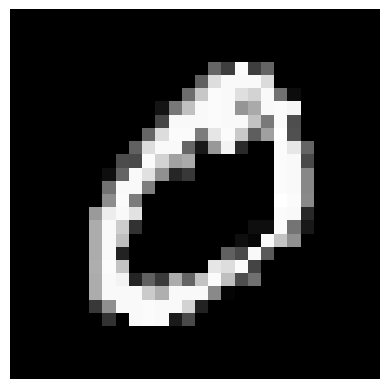

In [ ]:
image, label = train_dataset[1]
plt.imshow(transforms.ToPILImage()(image), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
examples = iter(train_loader)

In [ ]:
images, labels = next(examples)
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

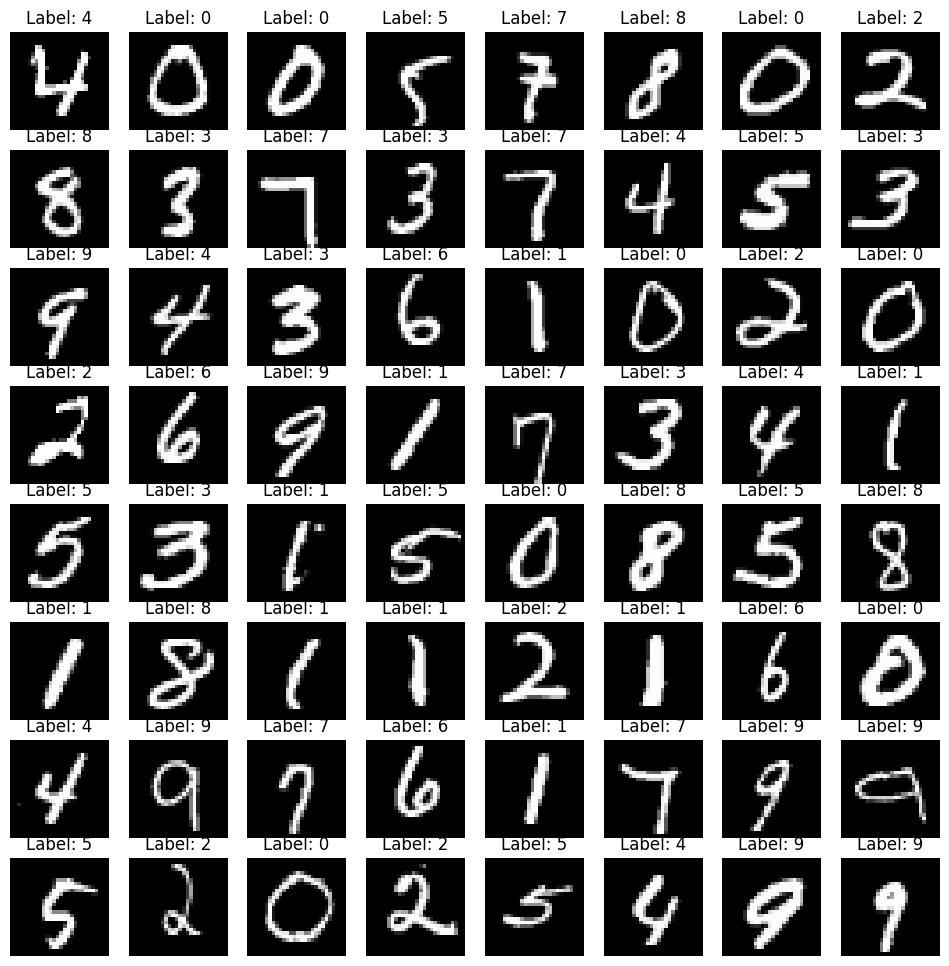

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images
def show_images(images, labels, nrows=8, ncols=8):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        # Convert image to numpy array and adjust pixel values
        img_np = images[i]
        img_np = (img_np + 1) / 2  # Adjust pixel values to range [0, 1]
        
        # Display image
        ax.imshow(img_np[0], cmap = 'gray')
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.show()

show_images(images, labels)

## Cifar10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader


In [ ]:
torch.cuda.is_available() 

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:


# Define transforms for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),                       # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5),       # Normalize image pixel values to range [-1, 1]
                         (0.5, 0.5, 0.5))
])

# Define batch size for data loader
batch_size = 64

# Create train and test datasets
train_dataset = CIFAR10(root=path, train=True, download=True, transform=transform)
test_dataset = CIFAR10(root=path, train=False, download=True, transform=transform)

# Create train and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [ ]:
images, labels = train_dataset[1]

In [ ]:
type(labels)

int

In [ ]:
classes = train_dataset.class_to_idx

In [ ]:
classes = list(train_dataset.class_to_idx)

In [ ]:
list(classes)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images
def show_images(images, labels, nrows=8, ncols=8):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        # Convert image to numpy array and adjust pixel values
        img_np = images[i].numpy().transpose((1, 2, 0))
        img_np = (img_np + 1) / 2  # Adjust pixel values to range [0, 1]
        
        # Display image
        ax.imshow(img_np)
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.show()

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
type(labels)

torch.Tensor

In [ ]:
images.shape, labels.shape


(torch.Size([64, 3, 32, 32]), torch.Size([64]))

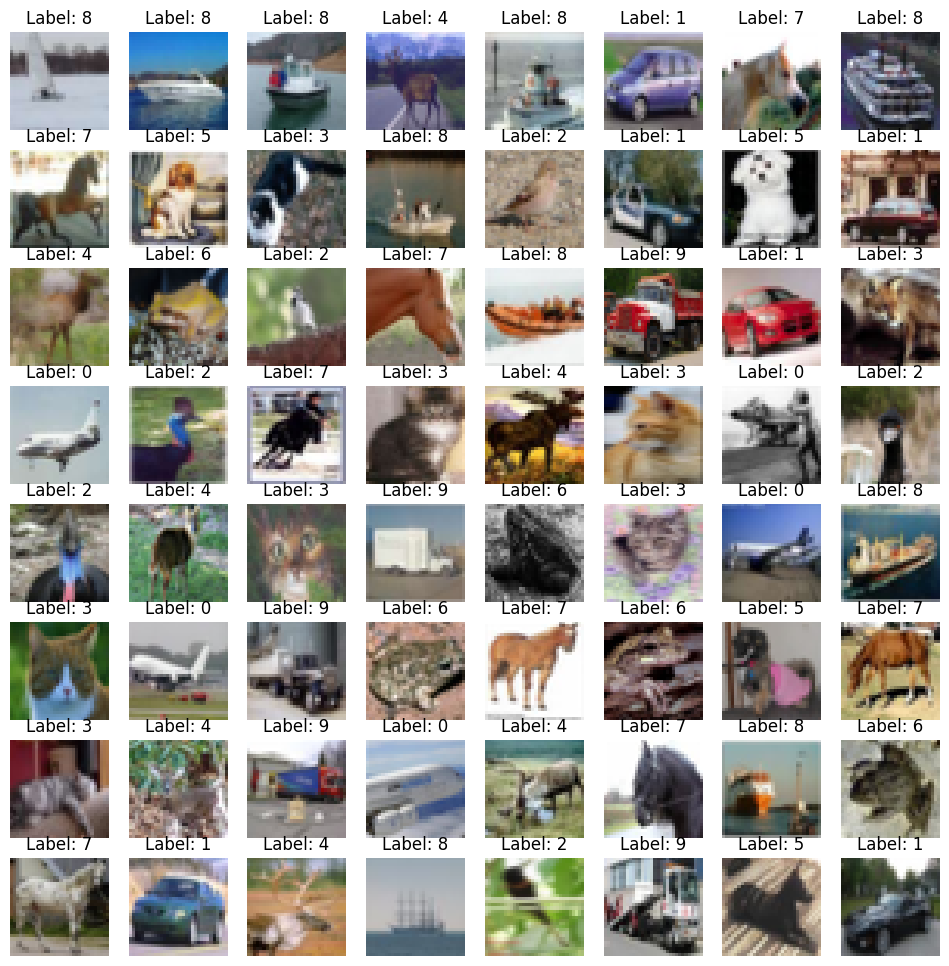

In [ ]:
# Display the images
show_images(images, labels)

## Kitti

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import Kitti, VisionDataset
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
from torch.nn.utils.rnn import pad_sequence


In [ ]:

class Kitti_v2(Kitti):
    def __init__(self, *args, **kwargs):
        super(Kitti_v2, self).__init__(*args, **kwargs)


In [ ]:
path = './Data'
batch_size = 2

# Define transforms
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize((375, 1242)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

In [ ]:
# Load KITTI train dataset
train_dataset = Kitti_v2(root=path, train='true', download=True, transform=transform)

# Load KITTI test dataset
test_dataset = Kitti_v2(root=path, train='false', download=True, transform=transform)

In [ ]:
# Define a custom collate function to handle variable-size targets
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    for item in targets:
        print(len(item[1]))
    
    # Pad or resize targets to a fixed size
    max_length = max(len(target) for target in targets)
    # padded_targets = pad_sequence(targets, batch_first=True, padding_value=0)
    
    return torch.stack(images), torch.stack(targets)


In [ ]:
# Create DataLoader for train dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [ ]:
train_dataset

Dataset Kitti
    Number of datapoints: 7481
    Root location: ./Data
    StandardTransform
Transform: Compose(
               Resize(size=(375, 1242), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
len(train_dataset)

7481

In [ ]:
image, targets = train_dataset[2]
type(targets)

list

In [ ]:
car_types = []
for image, targets in tqdm(train_dataset):
    for target in targets:
        if target['type'] not in car_types:
            car_types.append(target['type'])    
            print(f'\r{car_types}', end='')

  0%|                                                                                 | 10/7481 [00:00<01:21, 92.12it/s]

['Car', 'Van', 'DontCare', 'Cyclist', 'Pedestrian', 'Truck', 'Tram']

  1%|▉                                                                                | 89/7481 [00:00<01:24, 87.66it/s]

['Car', 'Van', 'DontCare', 'Cyclist', 'Pedestrian', 'Truck', 'Tram', 'Misc', 'Person_sitting']

100%|███████████████████████████████████████████████████████████████████████████████| 7481/7481 [01:27<00:00, 85.83it/s]


In [ ]:
max_len = 0
target_items = []

for image, targets in tqdm(train_dataset):
    target_items.append(len(targets))
    if len(targets) > max_len:
        max_len = len(targets)
        print(f'\r{max_len}', end='')


  0%|▏                                                                                | 20/7481 [00:00<01:17, 96.74it/s]

18

  1%|▊                                                                                | 70/7481 [00:00<01:18, 94.73it/s]

19

  2%|█▌                                                                              | 141/7481 [00:01<01:19, 92.72it/s]

20

  6%|████▉                                                                           | 459/7481 [00:05<01:20, 87.16it/s]

22

 32%|████████████████████████▉                                                      | 2365/7481 [00:26<00:55, 92.02it/s]

24

100%|███████████████████████████████████████████████████████████████████████████████| 7481/7481 [01:23<00:00, 90.01it/s]


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a histogram plot
output_notebook()

Loading BokehJS ...

In [ ]:
p = figure(title="Histogram of target_items", x_axis_label="Value", y_axis_label="Frequency")
hist, edges = np.histogram(target_items, bins=10)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(p)

In [ ]:
car_types

['Car',
 'Van',
 'DontCare',
 'Cyclist',
 'Pedestrian',
 'Truck',
 'Tram',
 'Misc',
 'Person_sitting']

In [ ]:
len(targets)

14

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(test_loader)

In [ ]:
images, labels = next(examples)

8
8


TypeError: expected Tensor as element 0 in argument 0, but got list

In [ ]:
images

tensor([[[[0.0980, 0.0980, 0.1020,  ..., 1.0000, 1.0000, 1.0000],
          [0.0980, 0.1020, 0.0980,  ..., 1.0000, 1.0000, 1.0000],
          [0.0706, 0.0706, 0.0824,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4196, 0.4275, 0.4157,  ..., 0.0784, 0.0824, 0.0863],
          [0.4275, 0.4275, 0.4118,  ..., 0.0784, 0.0824, 0.0863],
          [0.4039, 0.4039, 0.3882,  ..., 0.0980, 0.0941, 0.0902]],

         [[0.1255, 0.1333, 0.1373,  ..., 1.0000, 1.0000, 1.0000],
          [0.1255, 0.1333, 0.1294,  ..., 1.0000, 1.0000, 1.0000],
          [0.1255, 0.1216, 0.1059,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4039, 0.4118, 0.4157,  ..., 0.0941, 0.0941, 0.0941],
          [0.3961, 0.4078, 0.4118,  ..., 0.0980, 0.0941, 0.0980],
          [0.4000, 0.4039, 0.4039,  ..., 0.1059, 0.1098, 0.1059]],

         [[0.1059, 0.1216, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
          [0.0941, 0.0863, 0.0863,  ..., 1.0000, 1.0000, 1.0000],
          [0.0941, 0.0824, 0.0745,  ..., 1

## Cityscapes

## COCO